각 아두이노 보드마다 초기값이 서로 다르다는 것을 알게되었다. 어떤 보드는 층간 소음이 감지되었을 때 z값이 -1.01이 되는 반면 어떤 보드는 초기값이 -1.01인 경우도 있었다. 이를 해결하기 위해 이전 시점 값과 다음 시점 값의 편차를 이용하는 방법을 사용하여 데이터를 전처리하고자 하였다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def get_filepath(
    idx, type='noise'): return f'/Users/jaewone/Downloads/define_floor_noise/7. 실제 데이터 분석 및 CNN 모델 생성/final_dataset/{type}/{type}_{idx}.csv'


df = pd.read_csv(get_filepath(128), header=0, names=['x', 'y', 'z'])
df.T

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
x,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,...,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.00
y,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
z,0.97,0.99,0.97,0.99,0.99,0.96,0.99,0.99,0.98,0.97,...,0.97,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98


In [3]:
# min, max = (-0.38, 0.44)

df = pd.read_csv(get_filepath(128), header=0, names=['x', 'y', 'z'])
diff_df = df.diff()
diff_df.iloc[0] = [0, 0, 0]
diff_df = round(diff_df, 3) * 200
diff_df.where(diff_df <= 128, 127, inplace=True)
diff_df.where(diff_df >= -128, -128, inplace=True)
diff_df
# diff_df.where(diff_df.astype(float) > 0.011, 0, inplace=True)
# diff_df.to_csv('a.csv', index=False)

,x,y,z
0,0.0,0.0,0.0
1,2.0,0.0,4.0
2,-2.0,0.0,-4.0
3,0.0,0.0,4.0
4,0.0,0.0,0.0
...,...,...,...
123,2.0,0.0,0.0
124,-2.0,0.0,0.0
125,2.0,0.0,0.0
126,0.0,0.0,0.0


In [8]:
import os
dataset_path = '/Users/jaewone/Downloads/define_floor_noise/7. 실제 데이터 분석 및 CNN 모델 생성/final_dataset/white'
save_dataset_path = '/Users/jaewone/Downloads/define_floor_noise/7. 실제 데이터 분석 및 CNN 모델 생성/new_final_dataset/white'

if not os.path.exists(save_dataset_path):
    os.makedirs(save_dataset_path, exist_ok=True)

ok_file_list = []
for idx, file in enumerate([file for file in os.listdir(dataset_path) if file.endswith('.csv')]):
    df = pd.read_csv(os.path.join(dataset_path, file),
                     header=0, names=['x', 'y', 'z'])
    # diff_df = df.diff().abs()
    diff_df = df.diff()
    diff_df.iloc[0] = [0, 0, 0]
    # diff_df.where(diff_df.astype(float) > 0.011, 0, inplace=True)
    # diff_df = round(diff_df, 3)
    diff_df = round(diff_df, 3) * 200
    diff_df.where(diff_df <= 128, 127, inplace=True)
    diff_df.where(diff_df >= -128, -128, inplace=True)

    # if not diff_df.sum()['z'] == 0.0:
    ok_file_list.append(file)
    diff_df.to_csv(os.path.join(save_dataset_path, file), index=False)
    if len(ok_file_list) == 3198:
        break
print(len(ok_file_list))

2581


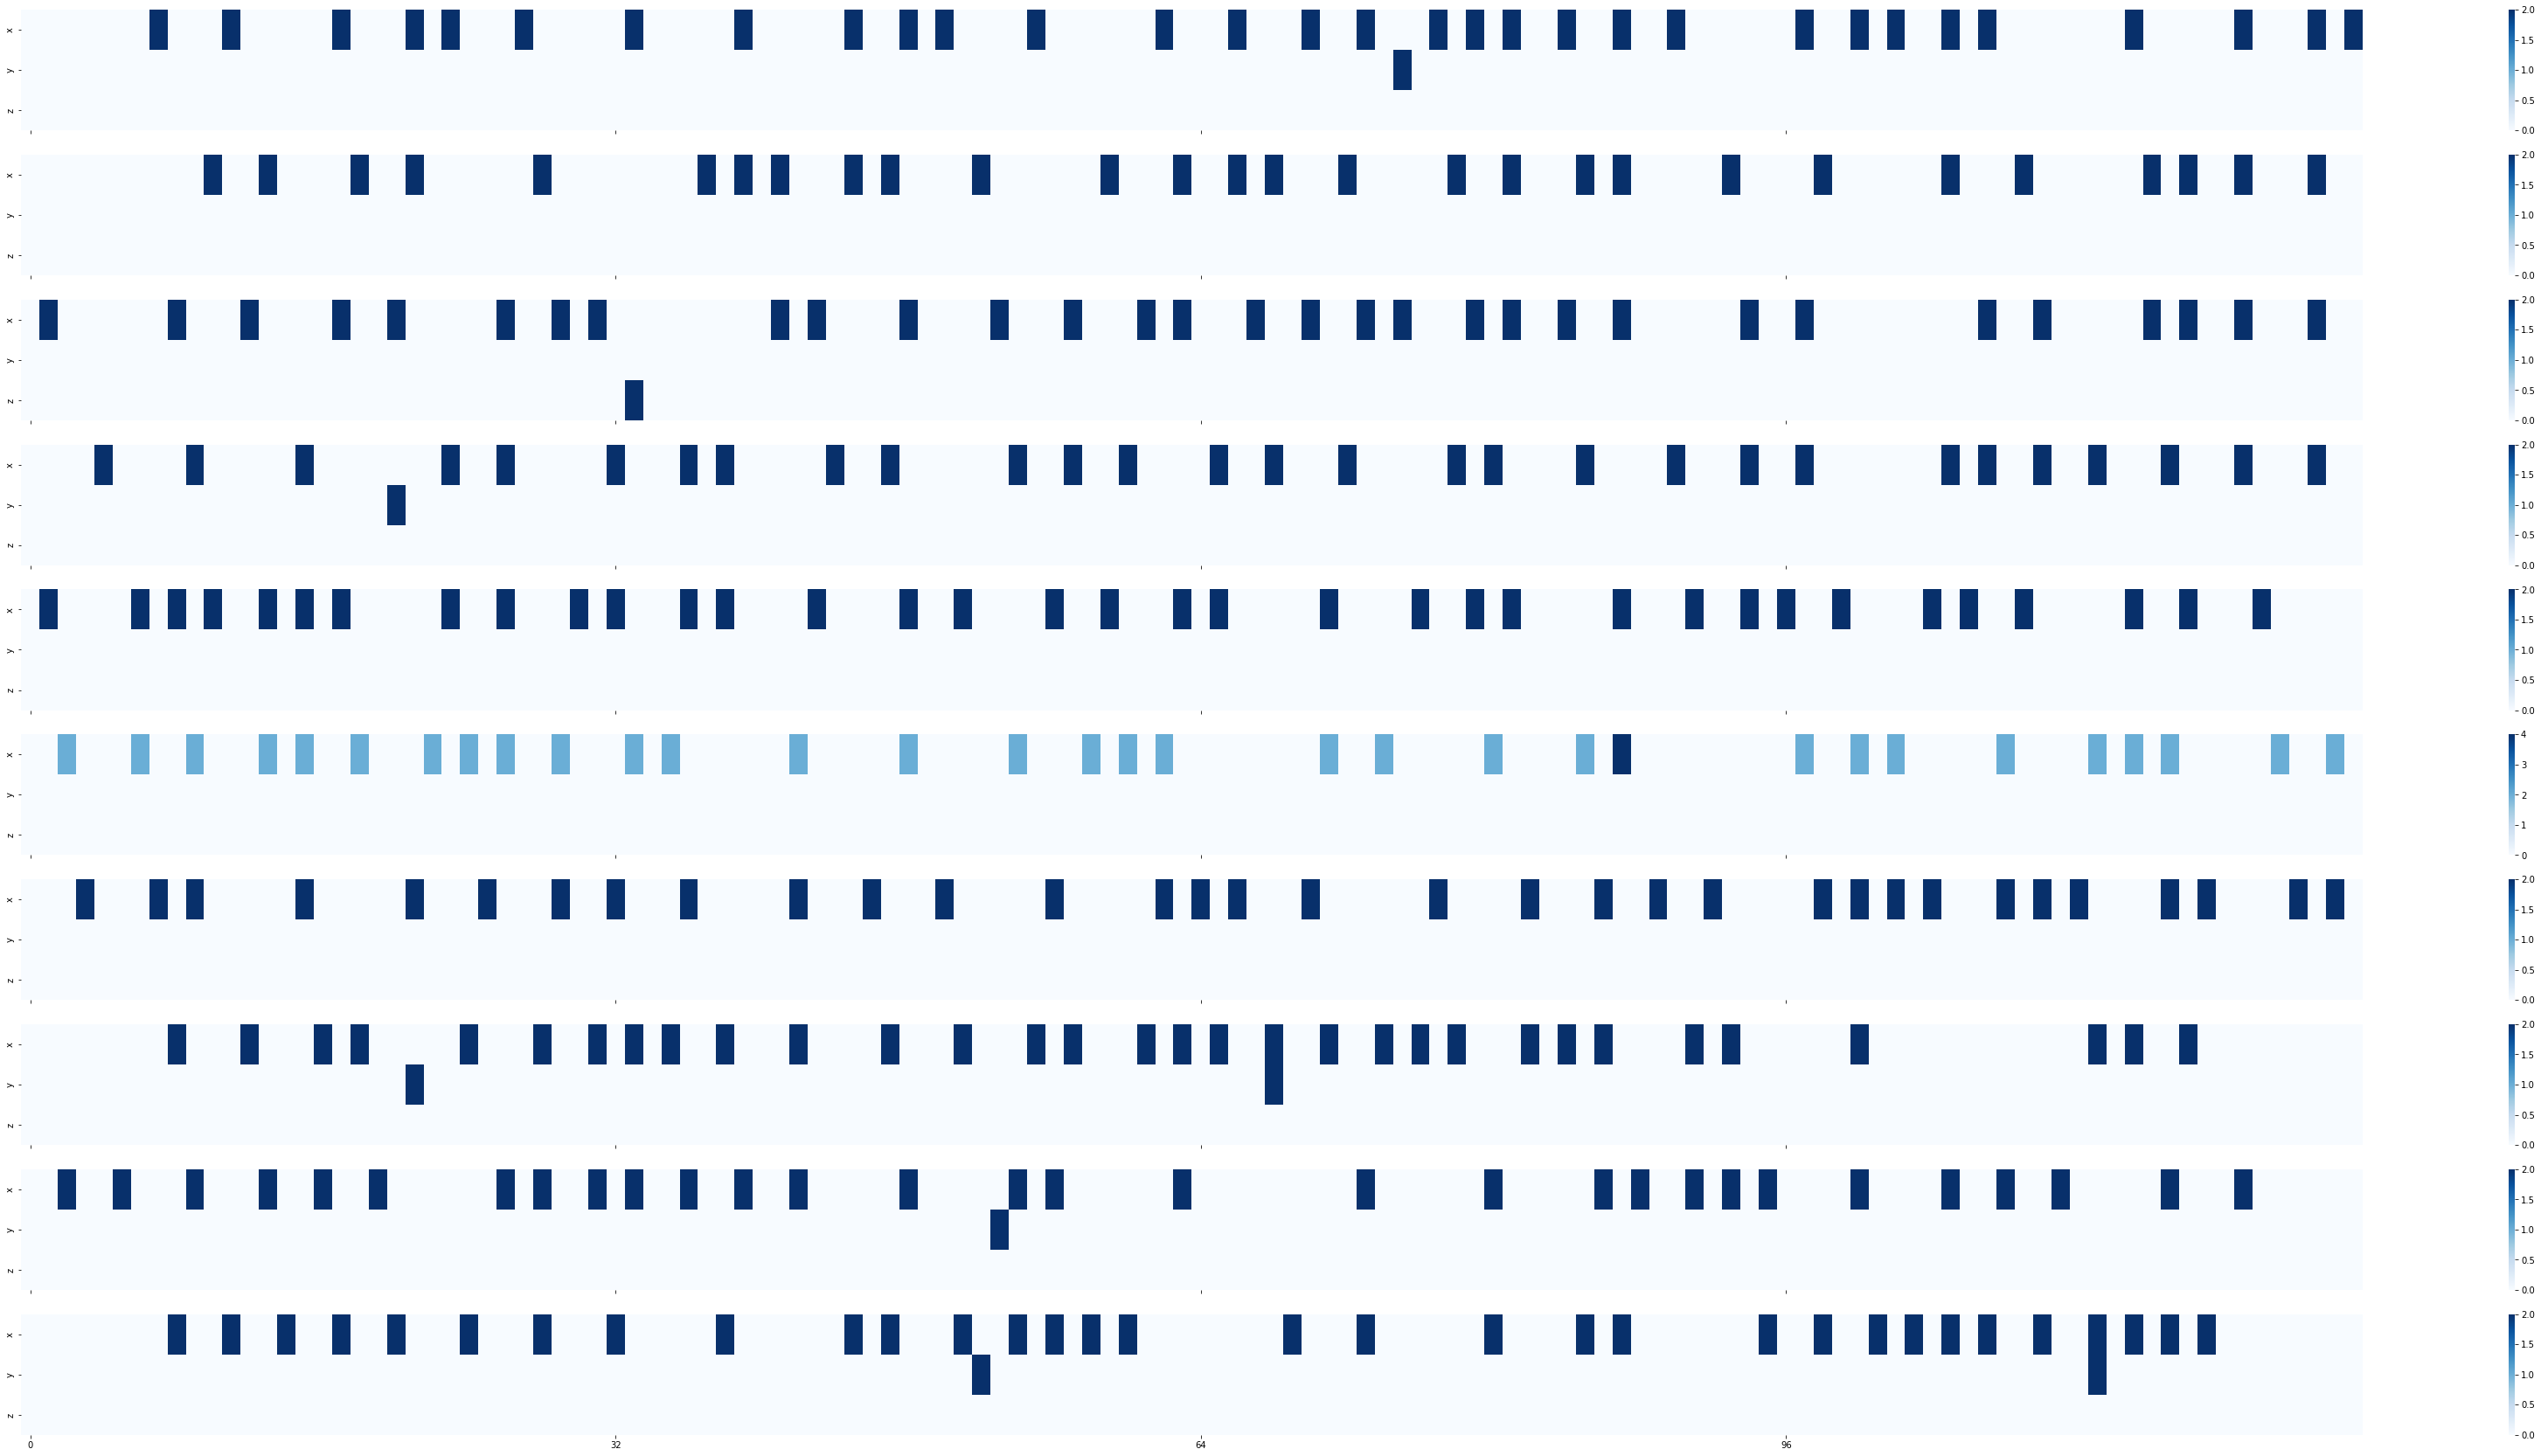

In [10]:
show_count = 10
show_type = 'white'
fig, axes = plt.subplots(
    show_count, 1, figsize=(60, 3*show_count), sharex=True)

for file_idx in range(show_count):
    df = pd.read_csv(get_filepath(file_idx + 10, show_type),
                     header=0, names=['x', 'y', 'z'])
    # diff_df = df.diff().abs()
    diff_df = df.diff()
    diff_df.iloc[0] = [0, 0, 0]
    # diff_df.where(diff_df.astype(float) > 0.011, 0, inplace=True)
    # diff_df = round(diff_df, 3)
    diff_df = round(diff_df, 3) * 200
    diff_df.where(diff_df <= 128, 127, inplace=True)
    diff_df.where(diff_df >= -128, -128, inplace=True)
    # print(diff_df.sum()['z'] == 0.0)

    sns.heatmap(diff_df.T, cmap='Blues', vmin=0, vmax=diff_df.max().max(),
                xticklabels=32, yticklabels=['x', 'y', 'z'], ax=axes[file_idx])
plt.show()